### Рубежный контроль №1 «Методы обработки данных»
https://github.com/ugapanyuk/courses_current/wiki/MMO_RK_1
* Студент — Коценко А.А.
* Группа — ИУ5-22М
* Вариант — 9
* Номер задачи №1 — 9
* Номер задачи №2 — 29

Дополнительные требования для группы ИУ5-22М:
* Для произвольной колонки данных постройте гистограмму
* https://nbviewer.org/github/ugapanyuk/courses_current/blob/main/notebooks/eda/eda_visualization.ipynb

Задача №9:
* Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения "хвостом распределения".
* https://nbviewer.org/github/ugapanyuk/courses_current/blob/main/notebooks/features/missing.ipynb

Задача №29:

* Для набора данных проведите удаление константных и псевдоконстантных признаков.
* https://nbviewer.jupyter.org/github/ugapanyuk/courses_current/blob/main/notebooks/features/selection.ipynb

### Загрузка данных
* Perth Metropolitan Area House Prices
* https://www.kaggle.com/datasets/syuzai/perth-house-prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.feature_selection import VarianceThreshold

In [2]:
hdata = pd.read_csv('all_perth_310121.csv',sep=",")
hdata.shape

(33656, 19)

In [3]:
hdata.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [4]:
hdata.dtypes

ADDRESS              object
SUBURB               object
PRICE                 int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN          object
NEAREST_STN_DIST      int64
DATE_SOLD            object
POSTCODE              int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH          object
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object

### Гистограмма

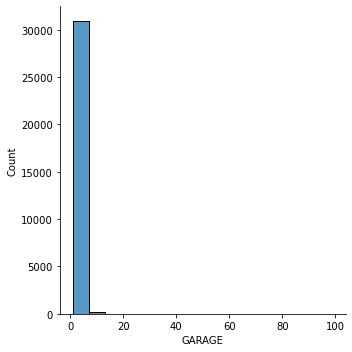

In [5]:
sns.displot(hdata['GARAGE'])

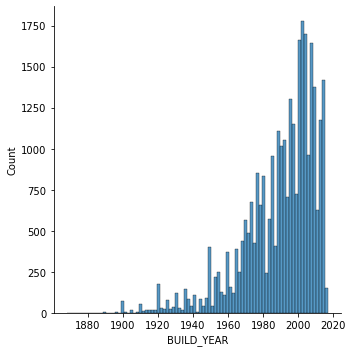

In [6]:
sns.displot(hdata['BUILD_YEAR'])

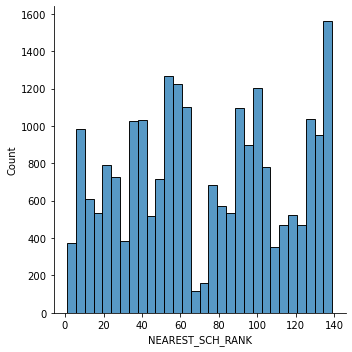

In [7]:
sns.displot(hdata['NEAREST_SCH_RANK'])

##### Гистограммы построены

### Заполнение «хвостом распределения»
* Для ассиметричного распределения:
* interquartile range IQR = Q3−Q1
* extreme_value = Q3 + K * IQR, 
* Значение K обычно выбирается равным 1,5. Но для экстремальных выбросов выбирают K=3

In [8]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [9]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

In [10]:
# Ассиметричное
IQR = hdata['BUILD_YEAR'].quantile(0.75) - hdata['BUILD_YEAR'].quantile(0.25)
BuildYear_ev1 = hdata['BUILD_YEAR'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, BuildYear_ev1))

IQR=27.0, extreme_value=2086.0


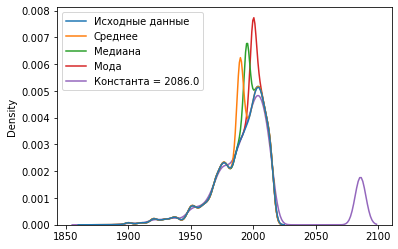

In [11]:
research_impute_numeric_column(hdata, 'BUILD_YEAR', BuildYear_ev1)

In [12]:
BuildYear_ev2 = hdata['BUILD_YEAR'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, BuildYear_ev2))

IQR=27.0, extreme_value=2045.5


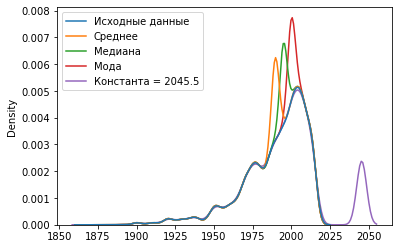

In [13]:
research_impute_numeric_column(hdata, 'BUILD_YEAR', BuildYear_ev2)

##### «Хвост распределения» найден

### Удаление константных и псевдоконстантных признаков

In [14]:
lst_arr = [[1,4,17,24],
           [2,4,17,22],
           [3,4,17,20],
           [4,4,17,18],
           [5,4,17,16],
           [6,4,17,14],
           [7,4,18,12],
           [8,4,17,10]]
lst_arr

[[1, 4, 17, 24],
 [2, 4, 17, 22],
 [3, 4, 17, 20],
 [4, 4, 17, 18],
 [5, 4, 17, 16],
 [6, 4, 17, 14],
 [7, 4, 18, 12],
 [8, 4, 17, 10]]

In [15]:
arr = np.array(lst_arr)
arr

array([[ 1,  4, 17, 24],
       [ 2,  4, 17, 22],
       [ 3,  4, 17, 20],
       [ 4,  4, 17, 18],
       [ 5,  4, 17, 16],
       [ 6,  4, 17, 14],
       [ 7,  4, 18, 12],
       [ 8,  4, 17, 10]])

In [16]:
data = pd.DataFrame(arr)
data

,0,1,2,3
0,1,4,17,24
1,2,4,17,22
2,3,4,17,20
3,4,4,17,18
4,5,4,17,16
5,6,4,17,14
6,7,4,18,12
7,8,4,17,10


In [17]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(data)
selector

VarianceThreshold(threshold=0.15)

In [18]:
# Значения дисперсий для каждого признака
selector.variances_

array([ 5.25    ,  0.      ,  0.109375, 21.      ])

In [19]:
arr_new = selector.transform(data)
arr_new

array([[ 1, 24],
       [ 2, 22],
       [ 3, 20],
       [ 4, 18],
       [ 5, 16],
       [ 6, 14],
       [ 7, 12],
       [ 8, 10]])

In [20]:
data_new = pd.DataFrame(arr_new)
data_new

,0,1
0,1,24
1,2,22
2,3,20
3,4,18
4,5,16
5,6,14
6,7,12
7,8,10


##### Константный и псевдоконстантный признаки удалены